In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
# Part 1: Understanding Product Categories
# Frequency table for 'category'
frequency_table = df['category'].value_counts().reset_index()
frequency_table.columns = ['category', 'Frequency']

print(frequency_table)

# Get top 5 most listed categories
top_5_categories = frequency_table.head(5)

print(top_5_categories)

                                   category  Frequency
0                         Sports & Outdoors     836265
1                                    Beauty      19312
2    Handmade Clothing, Shoes & Accessories      19229
3                               Bath & Body      19092
4                            Birthday Gifts      18978
..                                      ...        ...
291                       Motorbike Chassis        107
292                                   Plugs        107
293                  Alexa Built-In Devices        107
294          Smart Home Security & Lighting        104
295                          Smart Speakers         54

[296 rows x 2 columns]
                                 category  Frequency
0                       Sports & Outdoors     836265
1                                  Beauty      19312
2  Handmade Clothing, Shoes & Accessories      19229
3                             Bath & Body      19092
4                          Birthday Gifts      1897

/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_77457/3501321954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequency_table.head(10), x='Frequency', y='category', palette='viridis')


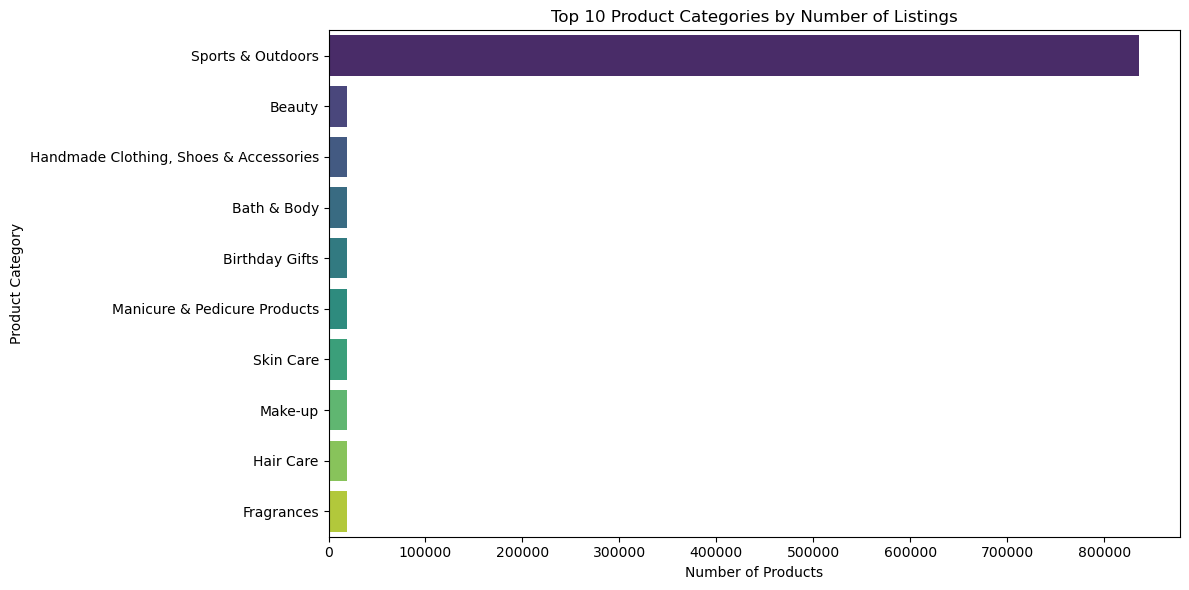

In [14]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=frequency_table.head(10), x='Frequency', y='category', palette='viridis')
plt.title('Top 10 Product Categories by Number of Listings')
plt.xlabel('Number of Products')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

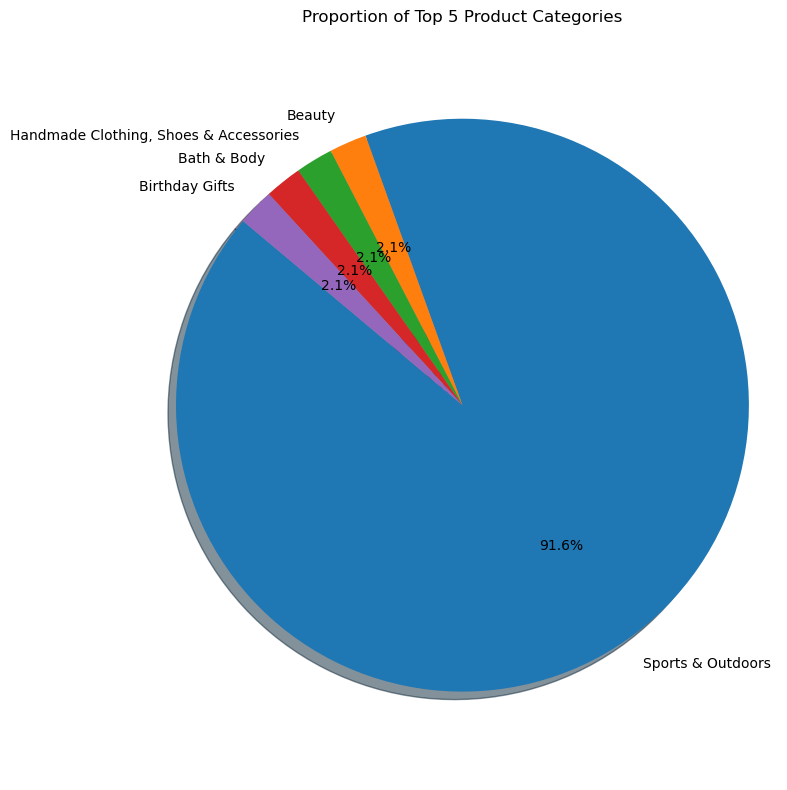

In [20]:
# Pie chart for top 5 categories
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_categories['Frequency'],
    labels=top_5_categories['category'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title('Proportion of Top 5 Product Categories')
plt.axis('equal')  # Ensures the pie is a perfect circle
plt.tight_layout()
plt.show()

In [22]:
# Part 2: Delving into Product Pricing

# Drop missing or invalid price values (if any)
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert to numeric
df = df.dropna(subset=['price'])  # Remove rows with NaN price

# Calculate statistics
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode().values  # May return multiple modes

# Display results
print(f"Mean Price: ${mean_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"Mode Price: {mode_price}")

Mean Price: $89.24
Median Price: $19.09
Mode Price: [9.99]


In [ ]:
# Average Price (Mean): $89.24
# Most Common Price (Mode): $9.99
# The average price is nearly 9× higher than the mode, 
# which strongly suggests that your product listings are skewed by a small number of high-cost products, while most items are low-priced (like $9.99).

In [23]:
# Measures of Dispersion:
#Determine the variance, standard deviation, range, and interquartile range for product price.

# Variance
price_variance = df['price'].var()

# Standard Deviation
price_std = df['price'].std()

# Range
price_range = df['price'].max() - df['price'].min()

# Interquartile Range (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
price_iqr = Q3 - Q1

# Display results
print(f"Variance: {price_variance:.2f}")
print(f"Standard Deviation: {price_std:.2f}")
print(f"Range: {price_range:.2f}")
print(f"Interquartile Range (IQR): {price_iqr:.2f}")


Variance: 119445.49
Standard Deviation: 345.61
Range: 100000.00
Interquartile Range (IQR): 36.00


In [ ]:
#Price distribution is heavily skewed with a small core of expensive outliers.

#The vast majority of products are priced closely together, but a few extremely expensive items inflate overall spread metrics.

#Variance	119,445.49 / Very high — prices are widely spread around the mean.
#Standard Deviation	345.61 / Also very high, confirming wide price dispersion.
#Range	100,000	/ HUGE difference between cheapest and most expensive product!
#IQR	36.00 / The middle 50% of products are priced within a $36 range — quite tight compared to the range.

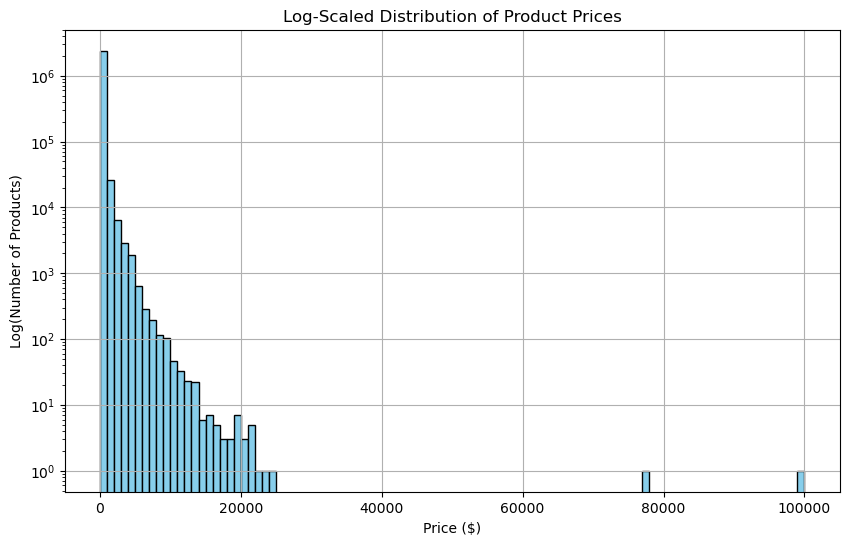

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100, color='skyblue', edgecolor='black', log=True)
plt.title('Log-Scaled Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Log(Number of Products)')
plt.grid(True)
plt.show()

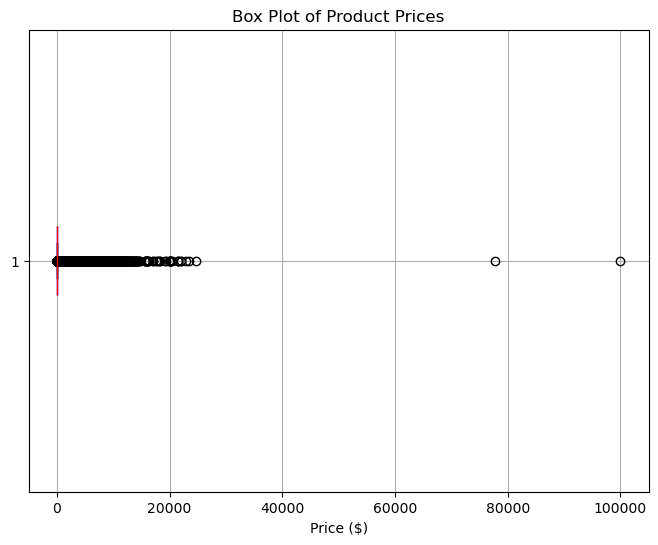

In [26]:
plt.figure(figsize=(8, 6))

# Box plot for 'price'
plt.boxplot(df['price'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Product Prices')
plt.xlabel('Price ($)')
plt.grid(True)
plt.show()


In [30]:
zero_rating_percentage = (df['stars'] == 0).mean() * 100
print(f"Percentage of products with 0 rating: {zero_rating_percentage:.2f}%")

Percentage of products with 0 rating: 50.16%


In [32]:
import numpy as np
# Replace 0 ratings with NaN
df['stars_cleaned'] = df['stars'].replace(0, np.nan)

# Drop rows with missing ratings if needed
rated_df = df.dropna(subset=['stars_cleaned'])

# Recalculate centrality measures
print("After removing 0 (missing) ratings:")
print(f"Mean: {rated_df['stars_cleaned'].mean():.2f}")
print(f"Median: {rated_df['stars_cleaned'].median():.2f}")
print(f"Mode: {rated_df['stars_cleaned'].mode().values}")

After removing 0 (missing) ratings:
Mean: 4.32
Median: 4.40
Mode: [4.5]


In [37]:
# Measures of Dispersion:
# Variance
rating_variance = rated_df['stars_cleaned'].var()

# Standard deviation
rating_std = rated_df['stars_cleaned'].std()

# Interquartile Range (IQR)
Q1 = rated_df['stars_cleaned'].quantile(0.25)
Q3 = rated_df['stars_cleaned'].quantile(0.75)
rating_iqr = Q3 - Q1

# Results
print(f"Rating Variance: {rating_variance:.2f}")
print(f"Rating Standard Deviation: {rating_std:.2f}")
print(f"Rating Interquartile Range (IQR): {rating_iqr:.2f}")


Rating Variance: 0.31
Rating Standard Deviation: 0.56
Rating Interquartile Range (IQR): 0.50


In [ ]:
#Ratings are fairly consistent, with most customers giving similar (high) ratings.

#The small IQR and low std dev confirm the strong peak around higher ratings.

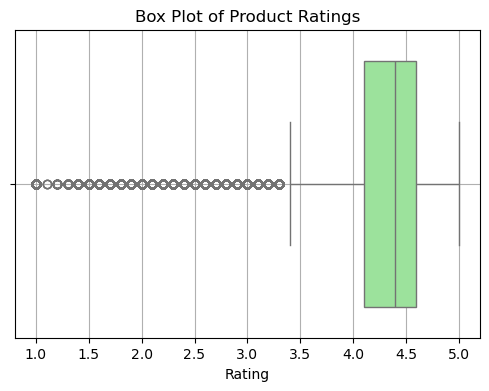

In [ ]:
# Are the ratings consistent, or is there a wide variation in customer feedback?
plt.figure(figsize=(6, 4))
sns.boxplot(x=rated_df['stars_cleaned'], color='lightgreen')
plt.title('Box Plot of Product Ratings')
plt.xlabel('Rating')
plt.grid(True)
plt.show()

In [39]:
from scipy.stats import skew, kurtosis

# Skewness
rating_skewness = skew(rated_df['stars_cleaned'].dropna())

# Kurtosis
rating_kurtosis = kurtosis(rated_df['stars_cleaned'].dropna())

# Results
print(f"Skewness: {rating_skewness:.2f}")
print(f"Kurtosis: {rating_kurtosis:.2f}")

Skewness: -2.38
Kurtosis: 9.78


In [ ]:
# Are the ratings normally distributed, or do they lean towards higher or lower values?
# Skewness	-2.38	Strong left skew — ratings heavily concentrated at the high end (like 4 or 5 stars), with a long tail toward lower ratings. This means most products are rated highly, but there are some low ratings dragging the tail left.
# Kurtosis	9.78	Very high kurtosis — heavy tails and sharp peak. Indicates many extreme ratings (outliers) and a distribution that’s more peaked than a normal bell curve

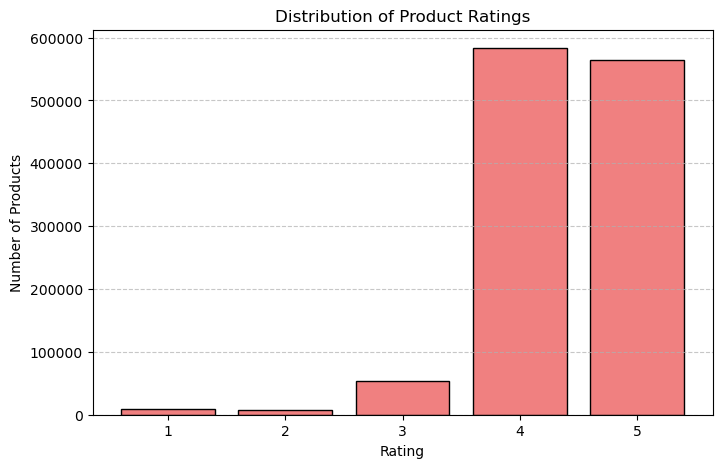

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(rated_df['stars_cleaned'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
         edgecolor='black', color='lightcoral', rwidth=0.8)

plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#